In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

In [2]:
colormap = {'A': '#A82721', 
            'O': '#EAC73E', 
            'V': '#254264', 
            'Ø': '#E6801A', 
            'I': '#3FB2BE', 
            'Å': '#2B8738', 
            'B': '#733280', 
            'F': '#E07EA8', 
            'C': '#96B226', 
            'D': '#127B7F', 
            'K': '#8B8474', 
            'Q': '#C49414', 
            'M': '#832B93', 
            'Æ': '#2C5877'}

In [3]:
df = pd.read_csv('../data/kandidater_data.csv').dropna()

In [4]:
df

,ID,Firstname,LastName,Gender,Birthdate,CurrentPartyCode,Profession,Education,1,2,...,16,17,18,19,20,21,22,23,24,25
0,391,Anne Valentina,Berthelsen,F,1994-09-16,F,Folketingsmedlem,Bachelor-/diplomuddannelse,2.0,2.0,...,2.0,-1.0,1.0,1.0,-1.0,-2.0,2.0,2.0,1.0,2.0
1,756,Mattias,Tesfaye,M,1981-03-31,A,Minister,Erhvervsuddannelse,1.0,1.0,...,-2.0,1.0,-1.0,1.0,2.0,-2.0,1.0,1.0,1.0,1.0
2,235,Kashif,Ahmad,M,1980-06-01,B,Ikke oplyst,Ikke oplyst,1.0,-1.0,...,1.0,-2.0,1.0,-2.0,-2.0,1.0,2.0,2.0,2.0,2.0
3,931,Ester,Esmarch,F,1974-12-31,K,Offentligt ansat,Bachelor-/diplomuddannelse,1.0,1.0,...,-1.0,-2.0,-1.0,1.0,-2.0,1.0,1.0,1.0,-1.0,1.0
5,386,Peter,Westermann,M,1985-06-01,F,Byråds- eller regionsrådsmedlem,Kandidat-/masteruddannelse,1.0,1.0,...,1.0,-1.0,1.0,1.0,-2.0,-2.0,2.0,2.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,203,Andreas,Steenberg,M,1983-07-22,B,Folketingsmedlem,Kandidat-/masteruddannelse,1.0,-2.0,...,1.0,-2.0,1.0,-1.0,-2.0,-1.0,-1.0,1.0,1.0,-1.0
988,934,Jonas Røjkjær,Laustsen,M,2000-12-25,K,Studerende,Gymnasial uddannelse,-1.0,-1.0,...,-2.0,-2.0,1.0,-1.0,-2.0,1.0,1.0,1.0,1.0,2.0
990,118,Tobias,Bennedsen,M,1986-04-14,C,Offentligt ansat,Bachelor-/diplomuddannelse,-2.0,-2.0,...,-2.0,-1.0,-1.0,-1.0,2.0,2.0,1.0,1.0,1.0,-2.0
993,294,Sandra Elisabeth,Skalvig,F,1990-10-09,I,Offentligt ansat,Bachelor-/diplomuddannelse,-1.0,-2.0,...,-2.0,-1.0,-2.0,-2.0,2.0,2.0,-1.0,-1.0,1.0,-1.0


### Missing not at random ?

<BarContainer object of 12 artists>

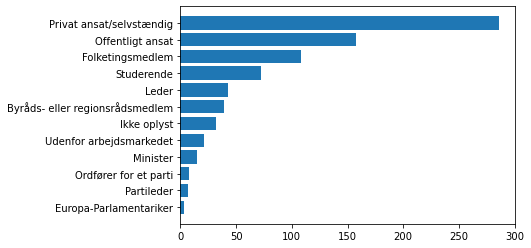

In [19]:
fig, ax = plt.subplots()
x, y = np.unique(df.Profession, return_counts=True)
idx = np.argsort(y)
ax.barh(x[idx], y[idx])

<BarContainer object of 9 artists>

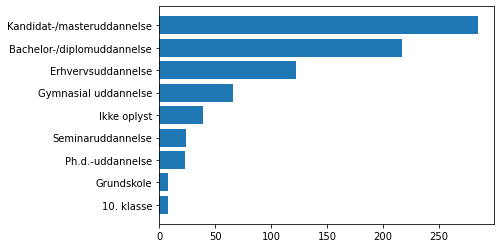

In [20]:
fig, ax = plt.subplots()
x, y = np.unique(df.Education, return_counts=True)
idx = np.argsort(y)
ax.barh(x[idx], y[idx])

(array([  1.,   0.,   0.,   0.,   0.,   8.,   0.,   0.,   5.,  65.,  63.,
         97.,  74.,  98., 129., 107.,  79.,  45.,  13.,   8.]),
 array([-29.  , -23.65, -18.3 , -12.95,  -7.6 ,  -2.25,   3.1 ,   8.45,
         13.8 ,  19.15,  24.5 ,  29.85,  35.2 ,  40.55,  45.9 ,  51.25,
         56.6 ,  61.95,  67.3 ,  72.65,  78.  ]),
 <BarContainer object of 20 artists>)

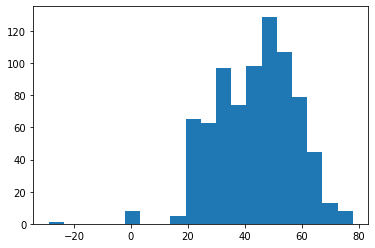

In [6]:
df['age'] = 2022 - df.Birthdate.str[:4].astype(int)
fig, ax = plt.subplots()
ax.hist(df.age, bins=20)

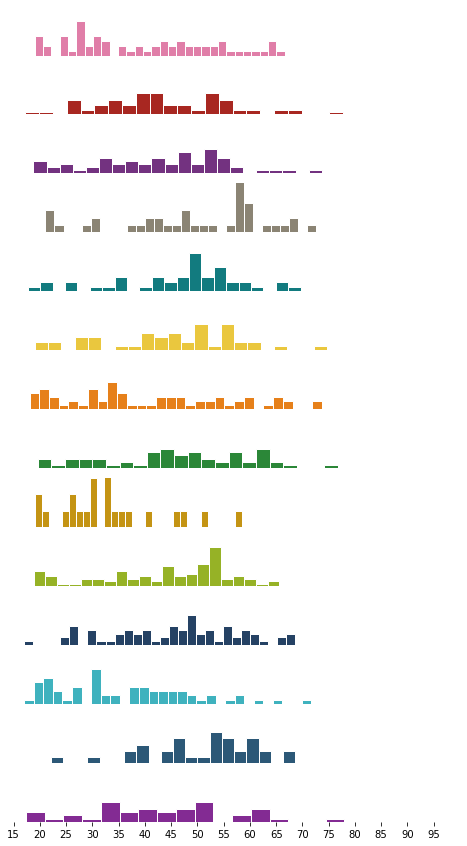

In [21]:
fig, ax = plt.subplots(df.CurrentPartyCode.nunique(), figsize=(8, 15))
means = df.groupby('CurrentPartyCode').agg(mean=('age', 'mean'))
for i, party in enumerate(df.CurrentPartyCode.unique()):
    mask = df.CurrentPartyCode == party
    #ax[i].grid()
    ax[i].hist(df[mask].age.to_numpy(), color=colormap[party], bins=30, density=True, edgecolor='white')
    # ax[i].boxplot(df[mask].age.to_numpy(), vert=False)
    ax[i].set_xlim(16, 100)
    ax[i].set_ylim(0, .1)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['bottom'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    
    
ax[-1].set_xticks(np.arange(15, 100, 5));

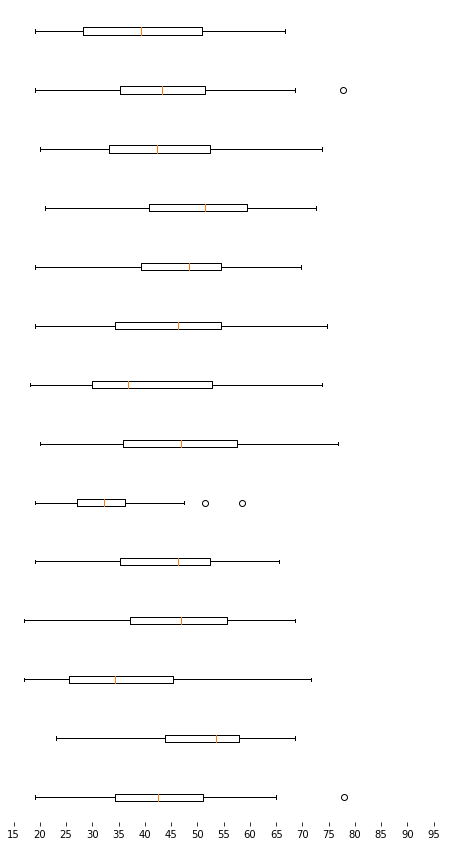

In [22]:
fig, ax = plt.subplots(df.CurrentPartyCode.nunique(), figsize=(8, 15))
means = df.groupby('CurrentPartyCode').agg(mean=('age', 'mean'))
for i, party in enumerate(df.CurrentPartyCode.unique()):
    mask = df.CurrentPartyCode == party
    #ax[i].grid()
    # ax[i].hist(df[mask].age.to_numpy(), color=colormap[party], bins=30, density=True)
    ax[i].boxplot(df[mask].age.to_numpy(), vert=False)
    ax[i].set_xlim(16, 100)
    #ax[i].set_ylim(0, .1)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['bottom'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    
    
ax[-1].set_xticks(np.arange(15, 100, 5));

In [45]:
means

,mean
CurrentPartyCode,
A,43.371795
B,42.661538
C,43.989011
D,45.977273
F,40.698413
I,37.206349
K,49.794872
M,41.428571
O,44.355556


### Propensity score

##### Gender

In [98]:
clf = LogisticRegression()

ct = ColumnTransformer([
    ('scaler', MinMaxScaler(), ['age']),
    ('one hot', OneHotEncoder(), ['CurrentPartyCode', 'Profession', 'Education'])
])

pipe = Pipeline([
    ('column transformer', ct), 
    ('logistic reg', clf)
])


In [99]:
# y = df.Gender.to_numpy().reshape(-1, 1)
# y = OneHotEncoder().fit_transform(y).toarray()
y = df.Gender.map({'M': 1, 'F': 0}).to_numpy()

In [100]:
pipe.fit(df, y)

Pipeline(steps=[('column transformer',
                 ColumnTransformer(transformers=[('scaler', MinMaxScaler(),
                                                  ['age']),
                                                 ('one hot', OneHotEncoder(),
                                                  ['CurrentPartyCode',
                                                   'Profession',
                                                   'Education'])])),
                ('logistic reg', LogisticRegression())])

In [150]:
pipe.predict_proba(df)

array([[0.64619073, 0.35380927],
       [0.12049453, 0.87950547],
       [0.31236972, 0.68763028],
       ...,
       [0.56692261, 0.43307739],
       [0.38244522, 0.61755478],
       [0.32679194, 0.67320806]])

In [101]:
propensity = pipe.predict_proba(df)[:, -1]
df['propensity'] = propensity

In [102]:
knn = NearestNeighbors(n_neighbors=1)
male = df[df.Gender=='M']
female = df[df.Gender=='F']

x = ct.transform(male)
knn.fit(x)

NearestNeighbors(n_neighbors=1)

In [107]:
x = ct.transform(female)
neigh_dist, neigh_ind = knn.kneighbors(x)

In [128]:
s1 = female

In [129]:
s2 = male.iloc[neigh_ind.reshape(-1)]

In [130]:
pca = PCA(n_components=2)
pca.fit(df[[str(i) for i in range(1, 26)]])

PCA(n_components=2)

In [132]:
xs1 = pca.transform(s1[[str(i) for i in range(1, 26)]])
xs2 = pca.transform(s2[[str(i) for i in range(1, 26)]])

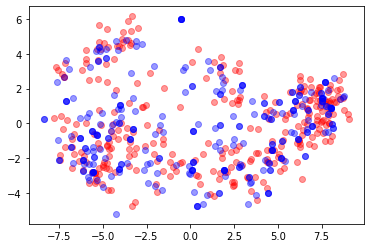

In [135]:
fig, ax = plt.subplots()
ax.scatter(xs1[:,0], xs1[:,1], color='red', alpha=.4)
ax.scatter(xs2[:,0], xs2[:,1], color='blue', alpha=.4)

In [142]:
import scipy.stats as stats

a, p_values = stats.ttest_rel(s1[[str(i) for i in range(1, 26)]], s2[[str(i) for i in range(1, 26)]])

In [149]:
np.set_printoptions(suppress=True)
np.where(p_values < 0.002)

(array([11, 15], dtype=int64),)

##### Age

In [159]:
clf = LogisticRegression()

ct = ColumnTransformer([
    ('one hot', OneHotEncoder(), ['CurrentPartyCode', 'Profession', 'Education', 'Gender'])
])

pipe = Pipeline([
    ('column transformer', ct), 
    ('logistic reg', clf)
])


In [160]:
y = (df.age < 30).astype(int)

In [162]:
pipe.fit(df, y)

Pipeline(steps=[('column transformer',
                 ColumnTransformer(transformers=[('one hot', OneHotEncoder(),
                                                  ['CurrentPartyCode',
                                                   'Profession', 'Education',
                                                   'Gender'])])),
                ('logistic reg', LogisticRegression())])

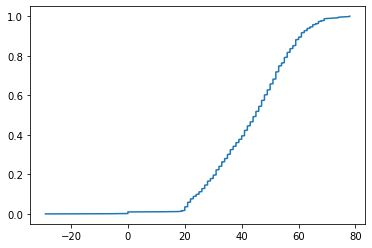

In [156]:
fig, ax = plt.subplots()

x = np.linspace(0, 1, 1000)
y = df.age.quantile(x)

ax.plot(y,x)

In [163]:
propensity = pipe.predict_proba(df)[:, -1]
df['propensity'] = propensity

In [165]:
knn = NearestNeighbors(n_neighbors=1)
ung = df[df.age < 30]
gammel = df[df.age >= 30]

x = ct.transform(ung)
knn.fit(x)

NearestNeighbors(n_neighbors=1)

In [166]:
x = ct.transform(gammel)
neigh_dist, neigh_ind = knn.kneighbors(x)

In [171]:
s1 = ung.iloc[neigh_ind.reshape(-1)]

In [172]:
s2 = gammel

In [173]:
a, p_values = stats.ttest_rel(s1[[str(i) for i in range(1, 26)]], s2[[str(i) for i in range(1, 26)]])

In [197]:
p_values.shape

(25,)

In [194]:
np.where(p_values < 0.002)[0]

array([ 3,  4,  5,  8, 12, 13, 14, 15, 16, 17, 22], dtype=int64)

In [185]:
treat = s1[[str(i) for i in range(1, 26)]].to_numpy()
control = s2[[str(i) for i in range(1, 26)]].to_numpy()

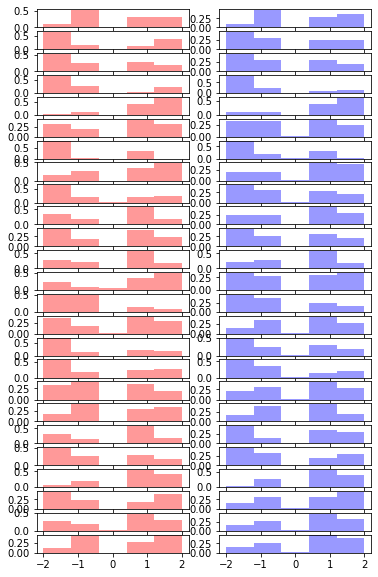

In [195]:
fig, axes = plt.subplots(25, 2, figsize=(6, 10))

for i in range(25):
    ax = axes[i]
    ax[0].hist(treat[:,i], color='red', alpha=.4, bins=5, density=True)
    ax[1].hist(control[:,i], color='blue', alpha=.4, bins=5, density=True)